In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_dynamics(alpha=20, beta=1, eta=0.001, x0=0.1, y0=0, t_num=1000):
    x_values = [x0]
    y_values = [y0]
    t_values = list(range(t_num))

    # Simulating the system
    for t in range(1, t_num):
        
        x_t = x_values[-1]
        y_t = y_values[-1]
        print(f"\rt={t}: x_t={x_t},y_t={y_t}", end="")
        x_next = -(1 + eta * y_t) * x_t
        y_next = y_t + eta * (alpha - beta * x_t**2 / 2)

        x_values.append(x_next)
        y_values.append(y_next)

    return x_values, y_values, t_values



0.02

In [81]:
# Simulating the system
x_vals, y_vals, t_vals = simulate_dynamics(t_num=1300)
# Create a colormap and a normalization instance
norm = plt.Normalize(min(t_vals), max(t_vals))
cmap = plt.cm.viridis

t=1299: x_t=0.18530397403023485,y_t=-5.680667271957846

In [82]:
# Adjusting the splitting of the time segments based on the new requirements

# Number of steps to stop before and after y < 0
stop_pad = 500

# Find the index where y first goes negative
split_index = next((i for i, y in enumerate(y_vals) if y < 0), len(y_vals))

# Adjusting the splitting points
split_index_before = max(0, split_index - stop_pad)
split_index_after = min(len(y_vals), split_index + stop_pad)



t0 = 200
t1 = 675
t2 = 800

# Splitting the sequences
x_vals_first = x_vals[:t0]
y_vals_first = y_vals[:t0]
t_vals_first = t_vals[:t0]

x_vals_second = x_vals[t0:t1]
y_vals_second = y_vals[t0:t1]
t_vals_second = t_vals[t0:t1]

x_vals_third = x_vals[t1:t2]
y_vals_third = y_vals[t1:t2]
t_vals_third = t_vals[t1:t2]

x_vals_fourth = x_vals[t2:]
y_vals_fourth = y_vals[t2:]
t_vals_fourth = t_vals[t2:]

# Creating the segments
segments = [
    (x_vals_first, y_vals_first, t_vals_first),
    (x_vals_second, y_vals_second, t_vals_second),
    (x_vals_third, y_vals_third, t_vals_third),
    (x_vals_fourth, y_vals_fourth, t_vals_fourth)
]

# Finding the global min and max for x and y for consistent scaling across all plots
global_x_min = min([min(segment[0]) for segment in segments])
global_x_max = max([max(segment[0]) for segment in segments])
global_y_min = min([min(segment[1]) for segment in segments])
global_y_max = max([max(segment[1]) for segment in segments])


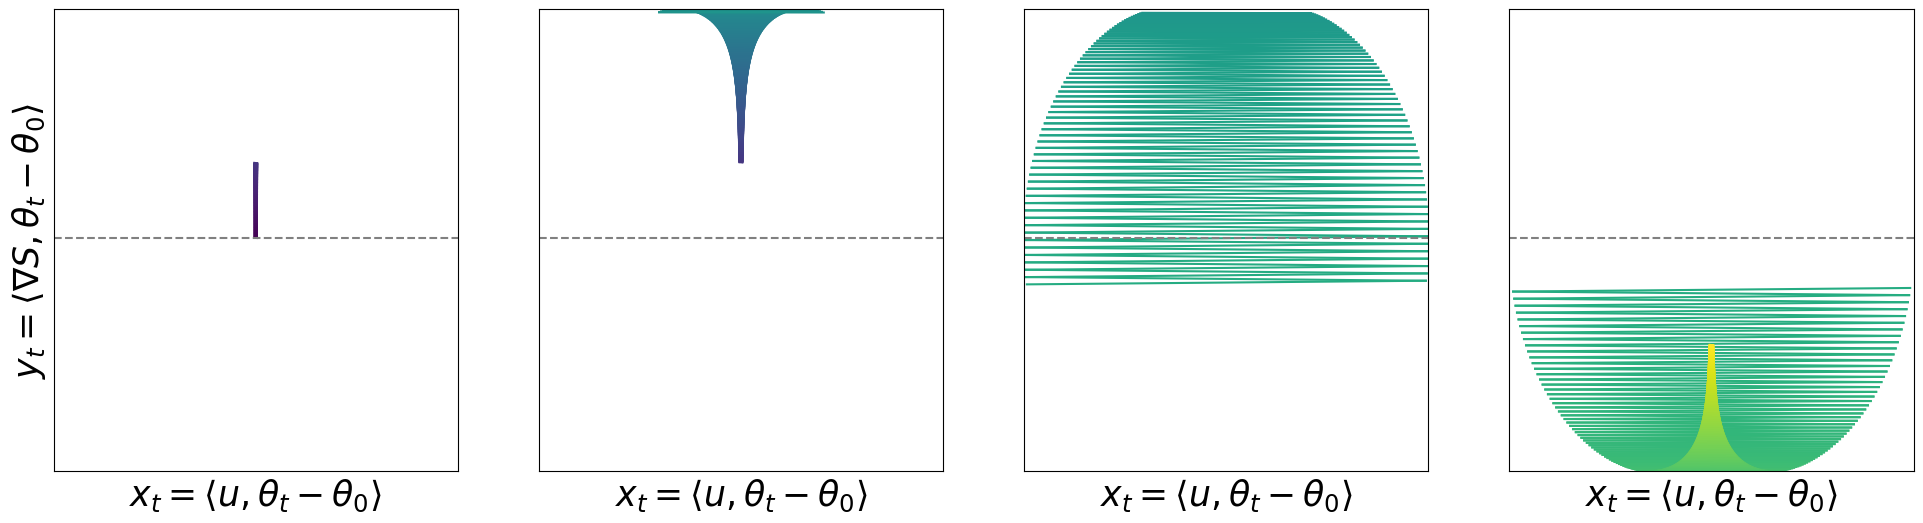

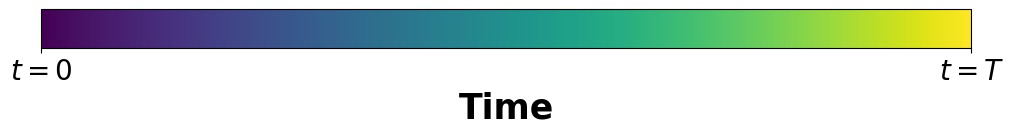

In [83]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Assuming 'segments' and 'norm' are defined as in your previous code

# Create a figure for the plots
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Plotting each of the four segments
for i, segment in enumerate(segments):
    x_segment, y_segment, t_segment = segment
    ax = axs[i]

    for j in range(len(x_segment) - 1):
        global_t_index = t_segment[j]
        color = plt.cm.viridis(norm(global_t_index))
        ax.plot(x_segment[j:j+2], y_segment[j:j+2], color=color)

    # Customize each subplot
    ax.set_xlabel(r'$x_t = \langle u, \theta_t - \theta_0 \rangle$', fontsize=25)
    if i == 0:  # Set y-axis label only for the leftmost plot
        ax.set_ylabel(r'$y_t = \langle \nabla S, \theta_t - \theta_0 \rangle$', fontsize=25)
    ax.set_xlim(global_x_min, global_x_max)
    ax.set_ylim(global_y_min, global_y_max)
    ax.axhline(0, color='gray', linestyle='--')
    ax.set_xticks([])
    ax.set_yticks([])

    # Save each plot
    plt.savefig(f'visualize_sequence_{i}.pdf', bbox_inches='tight')

# Create a separate figure for the colorbar
fig, ax = plt.subplots(figsize=(12, 0.5))
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), cax=ax, orientation='horizontal')
cbar.set_ticks([norm.vmin, norm.vmax])  # Set ticks at the start and end of the colorbar
cbar.set_ticklabels(['$t=0$', '$t=T$'], fontsize=20)  # Label the ticks
ax.set_xlabel('Time', fontsize=25, fontweight="bold")
plt.savefig('colorbar_legend.pdf', bbox_inches='tight')


In [85]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Assuming 'segments', 'norm', 'global_x_min', 'global_x_max', 'global_y_min', and 'global_y_max' are defined

# Plotting each of the four segments
for i, segment in enumerate(segments):
    fig, ax = plt.subplots(figsize=(6, 6))  # Create an individual figure for each plot
    x_segment, y_segment, t_segment = segment

    for j in range(len(x_segment) - 1):
        global_t_index = t_segment[j]
        color = plt.cm.viridis(norm(global_t_index))
        ax.plot(x_segment[j:j+2], y_segment[j:j+2], color=color)

    # Customize the subplot
    ax.set_xlabel(r'$x_t = \langle u, \theta_t - \theta_0 \rangle$', fontsize=32)
    if i == 0:  # Set y-axis label only for the leftmost plot
        ax.set_ylabel(r'$y_t = \langle \nabla S, \theta_t - \theta_0 \rangle$', fontsize=32)
    ax.set_xlim(global_x_min, global_x_max)
    ax.set_ylim(global_y_min, global_y_max)
    ax.axhline(0, color='gray', linestyle='--')
    ax.set_xticks([])
    ax.set_yticks([])

    # Save the individual plot
    plt.savefig(f'visualize_sequence_{i}.pdf', bbox_inches='tight')
    plt.close(fig)  # Close the figure to free up memory

# Create a separate figure for the colorbar
fig, ax = plt.subplots(figsize=(12, 0.5))
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), cax=ax, orientation='horizontal')
cbar.set_ticks([norm.vmin, norm.vmax])  # Set ticks at the start and end of the colorbar
cbar.set_ticklabels(['$t=0$', '$t=T$'], fontsize=20)  # Label the ticks
ax.set_xlabel('Time', fontsize=25, fontweight="bold")
plt.savefig('colorbar_legend.pdf', bbox_inches='tight')
plt.close(fig)  # Close the figure


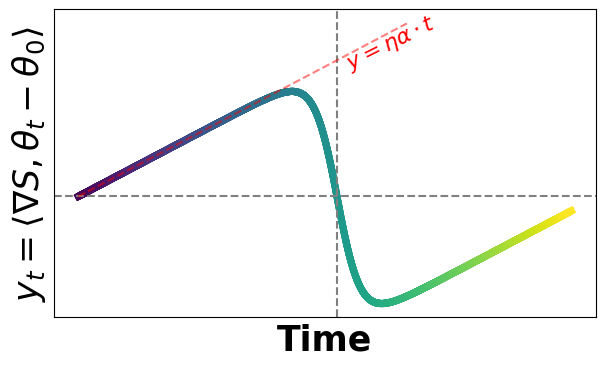

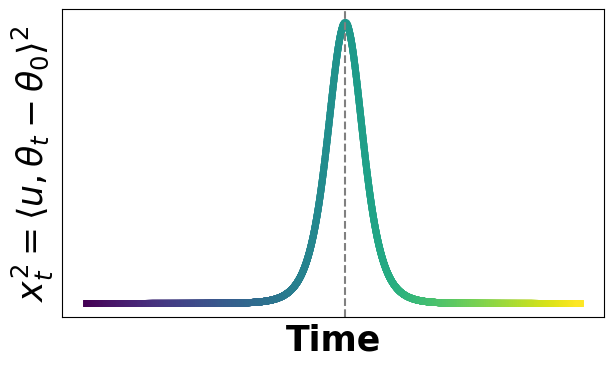

In [65]:
import matplotlib.pyplot as plt
import numpy as np
def find_first_negative_crossing(t_segment, y_segment):
    for i in range(len(y_segment) - 1):
        if y_segment[i] >= 0 and y_segment[i + 1] < 0:
            return t_segment[i]
    return None
# Assuming norm and segments are defined somewhere in your script

def plot_y_t(segments, first_negative_time, filename):
    fig, ax = plt.subplots(figsize=(7, 4))
    for segment in segments:
        t_segment, y_segment = segment[2], segment[1]
        for j in range(len(y_segment) - 1):
            color = plt.cm.viridis(norm(t_segment[j]))
            ax.plot(t_segment[j:j+2], y_segment[j:j+2], linewidth=5, color=color)
    ax.set_ylabel(r'$y_t = \langle \nabla S, \theta_t - \theta_0 \rangle$', fontsize=25)
    ax.set_xticks([])
    ax.set_yticks([])
    if first_negative_time is not None:
        ax.axvline(first_negative_time, color='gray', linestyle='--')
    ax.axhline(0, color='gray', linestyle='--')  # For the y_t plot
    tmp_t_vals = t_vals[:1000]
    ax.plot(tmp_t_vals, [0.02*t for t in tmp_t_vals], 
            color='red', linestyle='--', alpha=0.5)  # Adjust color and style as needed
    # Determine the position for the text
    end_t = tmp_t_vals[-1]
    end_y = 0.02 * end_t - 2

        # Add the text
    # Calculate the angle of the line (in degrees)
    slope = 0.5
    angle = np.degrees(np.arctan(slope))

    # Determine the position for the text - choose a point on your line
    text_t = tmp_t_vals[-1]+100  # For example, at the last point of the line
    text_y = 0.02 * text_t -8
    ax.set_xlabel('Time', fontsize=25, fontweight="bold")
    # Add the text, rotated to align with the line
    ax.text(text_t, text_y, r'$y = \eta \alpha \cdot t$', fontsize=16, rotation=angle,
            verticalalignment='bottom', horizontalalignment='right', color="red")

    plt.savefig(filename, bbox_inches='tight')

def plot_x_t(segments, first_negative_time, filename):
    fig, ax = plt.subplots(figsize=(7, 4))
    for segment in segments:
        t_segment, x_segment = segment[2], segment[0]
        for j in range(len(x_segment) - 1):
            color = plt.cm.viridis(norm(t_segment[j]))
            ax.plot(t_segment[j:j+2], [i**2 for i in x_segment[j:j+2]], color=color, linewidth=5)
    ax.set_ylabel(r'$x_t^2 = \langle u, \theta_t - \theta_0 \rangle^2$', fontsize=25)
    ax.set_xlabel('Time', fontsize=25, fontweight="bold")
    ax.set_xticks([])
    ax.set_yticks([])
    if first_negative_time is not None:
        ax.axvline(first_negative_time, color='gray', linestyle='--')
    plt.savefig(filename, bbox_inches='tight')

# Calculate the first negative crossing time
first_negative_time = None
for segment in segments:
    t_segment, y_segment = segment[2], segment[1]
    crossing_time = find_first_negative_crossing(t_segment, y_segment)
    if first_negative_time is None or (crossing_time is not None and crossing_time < first_negative_time):
        first_negative_time = crossing_time

# Create and save each plot separately
plot_y_t(segments, first_negative_time, 'yt_time_plot.pdf')
plot_x_t(segments, first_negative_time, 'xt_time_plot.pdf')


In [91]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("Set2")
plt.rcParams.update({"xtick.labelsize": 17, "ytick.labelsize": 17,
"axes.titlesize": 18, "axes.titleweight": 'bold', "axes.labelsize": 19, "axes.labelweight": 'bold'})
cbar_kws = {"orientation":"vertical", 
            "shrink":1,
            'extend':'min', 
            'extendfrac':0.1, 
            "ticks":np.arange(0,22), 
            "drawedges":True,
           } # color bar keyword arguments

In [92]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'results' directory contains the 'train_loss_final' and 'eigs_final' files
train_loss_final_path = 'results/train_loss_final'
eigs_final_path = 'results/eigs_final'

# Load the files
train_loss_final = torch.load(train_loss_final_path)
eigs_final = torch.load(eigs_final_path)

# Filter eigs_final
eigs_filtered = eigs_final[:, 0]

# Since we sample eigs_final every gd_eig_freq steps, create an x-axis that accounts for this
gd_eig_freq = 50  # Replace with the actual frequency of eigenvalue sampling
steps_eigs = torch.arange(0, len(eigs_filtered) * gd_eig_freq, gd_eig_freq)

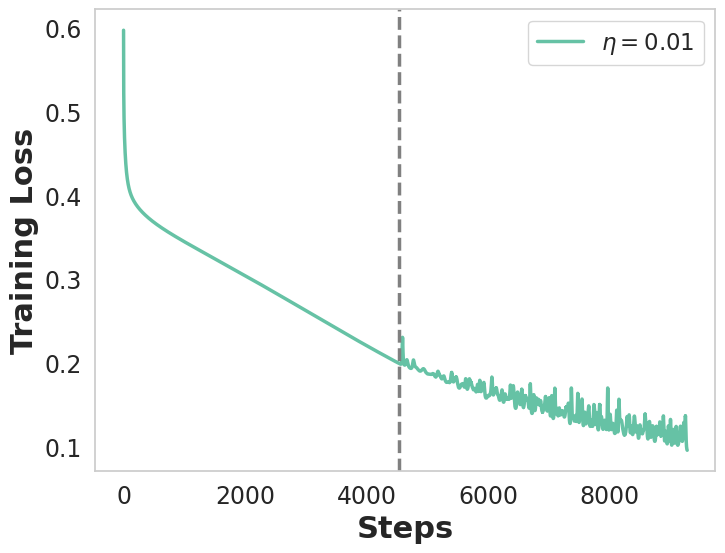

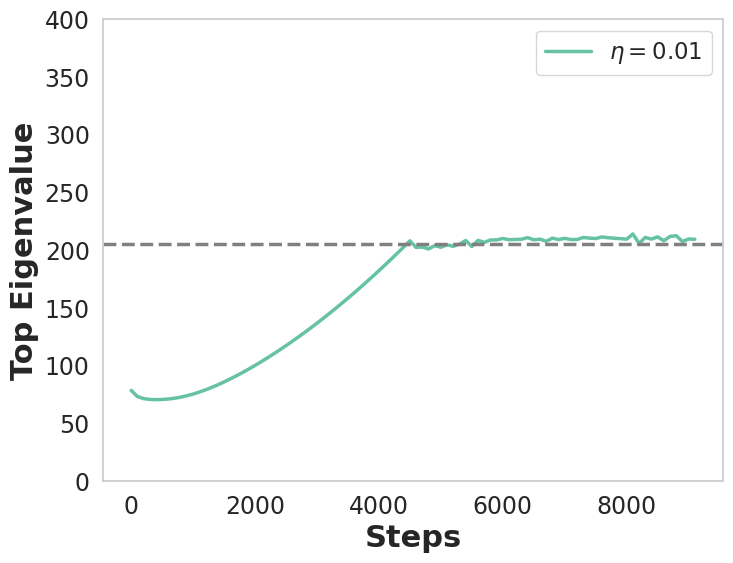

In [179]:
# Plotting
# Compute the difference between each point in train_loss_final and the previous one
# Compute the absolute differences between each point in train_loss_final and the previous one
differences = torch.abs(torch.diff(train_loss_final))

# Find the first index after the first 100 steps where the difference exceeds 0.001
threshold = 0.001
first_index_exceeding_threshold = ((differences[100:] > threshold).nonzero(as_tuple=True)[0] + 100)[0].item()

# Use this index for plotting
inx = first_index_exceeding_threshold



# First plot: train_loss_final against the number of steps in a loglog scale
plt.figure(figsize=(8, 6))
sns.lineplot(x=torch.arange(len(train_loss_final)), y=train_loss_final, label = "$\eta=0.01$")
plt.xlabel('Steps', fontsize=22)
plt.ylabel('Training Loss', fontsize=22)
plt.grid(False)

threshold_eigs = 200
first_index_crossing_eigs = 103*(eigs_filtered > threshold_eigs).nonzero(as_tuple=True)[0][0].item()


plt.axvline(x=first_index_crossing_eigs, color='gray', linestyle='--', label=f'Argmax Difference at {inx}')
plt.show()

# Second plot: eigs_final against the number of steps, with a log scale for the x-axis
plt.figure(figsize=(8, 6))
sns.lineplot(x=torch.arange(len(eigs_filtered))*100, y=eigs_filtered, label = "$\eta=0.01$")
plt.xlabel('Steps', fontsize=22)
plt.ylabel('Top Eigenvalue', fontsize=22)
plt.ylim(0, 400)
plt.axhline(y=205, color='gray', linestyle='--')
plt.grid(False)

plt.show()

In [181]:
train_loss_final_001 == train_loss_final_002

tensor([True, True, True,  ..., True, True, True])

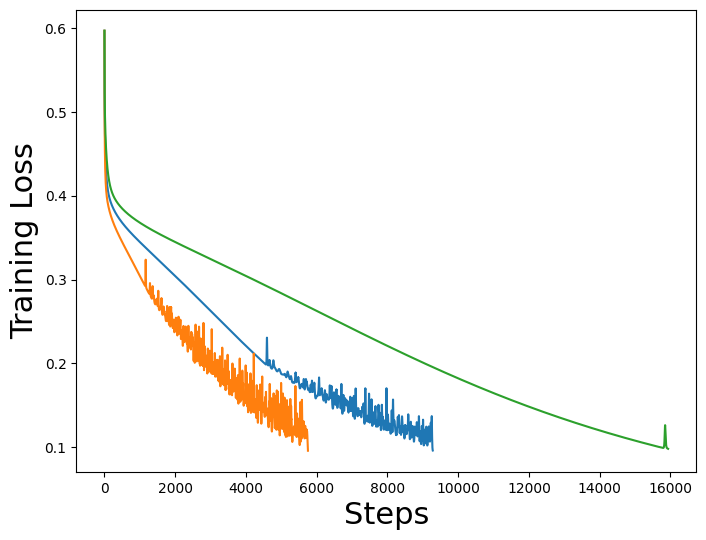

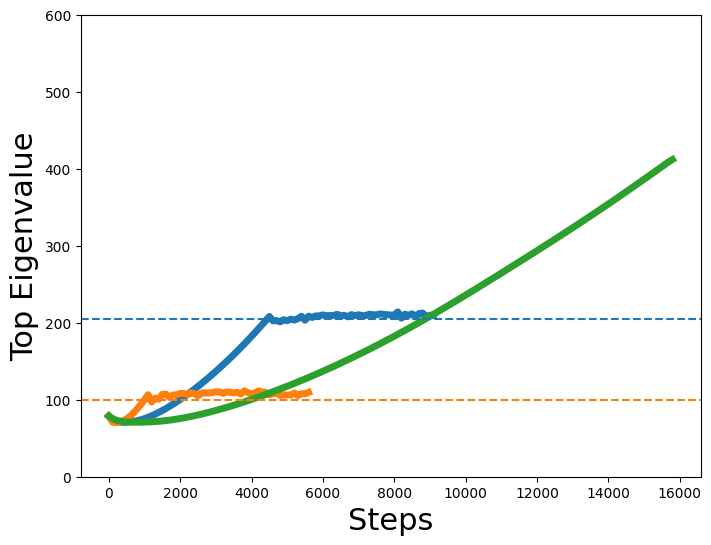

In [4]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from both directories
def load_data(lr_path):
    train_loss_final_path = f'{lr_path}/train_loss_final'
    eigs_final_path = f'{lr_path}/eigs_final'

    train_loss_final = torch.load(train_loss_final_path)
    eigs_final = torch.load(eigs_final_path)

    return train_loss_final, eigs_final[:, 0]

train_loss_final_001, eigs_filtered_001 = load_data('results/0.01')
train_loss_final_002, eigs_filtered_002 = load_data('results/0.02')
train_loss_final_0005, eigs_filtered_0005 = load_data('results/0.005')



# Common settings
gd_eig_freq = 100

# First plot: train_loss_final against the number of steps
plt.figure(figsize=(8, 6))
sns.lineplot(x=torch.arange(len(train_loss_final_001)), y=train_loss_final_001)
sns.lineplot(x=torch.arange(len(train_loss_final_002)), y=train_loss_final_002)
sns.lineplot(x=torch.arange(len(train_loss_final_0005)), y=train_loss_final_0005)

plt.xlabel('Steps', fontsize=22)
plt.ylabel('Training Loss', fontsize=22)
plt.grid(False)
# Do not call plt.legend() here
plt.savefig('training_loss_plot.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()

# Second plot: eigs_final against the number of steps
plt.figure(figsize=(8, 6))
sns.lineplot(x=torch.arange(len(eigs_filtered_001)) * gd_eig_freq, y=eigs_filtered_001, linewidth=5)
sns.lineplot(x=torch.arange(len(eigs_filtered_002)) * gd_eig_freq, y=eigs_filtered_002, linewidth=5)
sns.lineplot(x=torch.arange(len(eigs_filtered_0005)) * gd_eig_freq, y=eigs_filtered_0005, linewidth=5)

plt.xlabel('Steps', fontsize=22)
plt.ylabel('Top Eigenvalue', fontsize=22)
plt.ylim(0, 600)
# Retrieve the line colors for consistency
line_colors = [line.get_color() for line in plt.gca().get_lines()]
plt.axhline(y=205, color=line_colors[0], linestyle='--')
plt.axhline(y=100, color=line_colors[1], linestyle='--')
plt.grid(False)
# Do not call plt.legend() here either
plt.savefig('eigenvalues_plot.png', dpi=300, format='png', bbox_inches='tight')
plt.show()




In [ ]:
# Create a dummy figure for the legend
legend_fig = plt.figure(figsize=(6, 0.3))
legend_ax = legend_fig.add_subplot(111)

# Plot empty lists to create the legend entries
legend_ax.plot([], [], label="$\eta=0.01$", color=sns.color_palette()[0], linewidth=5)
legend_ax.plot([], [], label="$\eta=0.02$", color=sns.color_palette()[1], linewidth=5)

# Hide the axes
legend_ax.axis('off')

# Create the legend
legend = legend_ax.legend(loc='center', ncol=2, frameon=False, fontsize=16)

# Save the legend as a separate PDF
legend_fig.savefig('legend_bar.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.close(legend_fig)

# For the second plot
plt.savefig('eigenvalues_plot.pdf', dpi=300, format='pdf', bbox_inches='tight')